In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
from cartopy import feature as cfeature
import warnings 
# this will allow us to use the code in peace :) 
warnings.filterwarnings("ignore")

### Lecture 20:

- Learn about geoplot and geopandas
- Learn a bit about coordinate systems (UTM versus WGS84, as examples)
- Learn something about Hawaiian volcanism


By now we have learned a great deal about plotting and map making.  In this lecture we will pull together a number of concepts and add some new tools (geoplot and geopandas).  **Geopandas** is a software package built on top of **Pandas** that is made for dealing with spatial data.  **Geoplot** is built on top of **matplotlib** and has a number of mapping tools that we can use.  **Geoplot** is to **cartopy** as  **seaborn** is to **matplotlib**.

If you haven't installed these, you can use **conda** on your command line or within this notebook (on macs). 

In [2]:
#!conda install geoplot -c conda-forge
# and 
#!conda install geopandas

In [3]:
import geopandas as gpd
import geoplot as gplt


By now you should be familiar with the rudiments of **cartopy**.  We will now learn how to make more complicated plots using the  volcanoes active over the last 6 million years as an example. We downloaded the data from this website: https://www.navdat.org/NavdatSearch/Search.cfm  by setting the Age filter to 6 (Ma) and exporting the data as an excel spreadsheet which in turn got saved as a tab delimited text file in _Datafiles/navdat.txt_) 

The first new thing we need to grapple with is the **geopandas** overlay on **Pandas**.  This is a very powerful, but also complicated software package.  The first thing we will use it for is wrangling our volcano dataset into a form that we can plot with **geoplot**.  

A **Geopandas DataFrame** differs from a **Pandas DataFrame** in that it has a **geometry** field which can be points, polygons or other spatial data types.  


We'll approach this as follows: 
- we need to first read in the data set with **Pandas**
- make a map as we did in Lecture 18
- turn the **Pandas DataFrame** into a **geopandas** one by putting in the _geometry_ information required by **geoplot**.
- Use **geoplot** to do some new stuff.  

In [4]:
#Read in the data file
df=pd.read_csv('Datasets/navdat.txt',sep='\t')
df.head()

,SAMPLE ID,CALCULATED AGE,CALCULATED MAX AGE,CALCULATED MIN AGE,LATITUDE,LONGITUDE,STATE
0,82-97,0.0,0.006,0.002,41.4090,-122.1945,CALIFORNIA
1,97-4,0.0,0.006,0.002,41.4272,-122.1600,CALIFORNIA
2,99-12A,0.0,0.006,0.002,41.4258,-122.1635,CALIFORNIA
3,99-14,0.0,0.006,0.002,41.4153,-122.1793,CALIFORNIA
4,99-15,0.0,0.006,0.002,41.4298,-122.1695,CALIFORNIA


Make the map (cribbing from Lecture 18). 

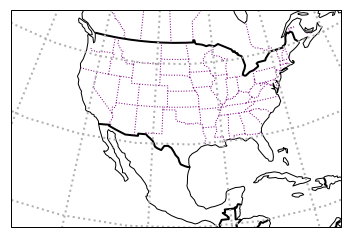

In [5]:
proj = ccrs.LambertConformal(central_longitude=260, central_latitude=33)
ax = plt.axes(projection=proj)
ax.set_extent([-130, -70, 15, 52], crs=ccrs.PlateCarree())
gl=ax.gridlines(ylocs=np.arange(0,90,15.),xlocs=np.arange(-180.,180,15.),\
                linewidth=2, linestyle="dotted")

ax.coastlines();

ax.add_feature(BORDERS,linestyle='-',linewidth=2)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
       edgecolor='purple',
        facecolor='none',
        linestyle='dotted')
ax.add_feature(states_provinces);

Now for the new stuff.  We nedd to use the **.GeoDataFrame** method of **geopandas** to put in the geometry field required by **geoplots**.   

In [6]:
    
gdf=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.LONGITUDE,df.LATITUDE))
gdf.head()

,SAMPLE ID,CALCULATED AGE,CALCULATED MAX AGE,CALCULATED MIN AGE,LATITUDE,LONGITUDE,STATE,geometry
0,82-97,0.0,0.006,0.002,41.4090,-122.1945,CALIFORNIA,POINT (-122.1945 41.409)
1,97-4,0.0,0.006,0.002,41.4272,-122.1600,CALIFORNIA,POINT (-122.16 41.4272)
2,99-12A,0.0,0.006,0.002,41.4258,-122.1635,CALIFORNIA,POINT (-122.1635 41.4258)
3,99-14,0.0,0.006,0.002,41.4153,-122.1793,CALIFORNIA,POINT (-122.1793 41.4153)
4,99-15,0.0,0.006,0.002,41.4298,-122.1695,CALIFORNIA,POINT (-122.1695 41.4298)


You can see that **Geopandas** put in a new column, called _geometry_ with the lat/lon as a tuple with the geometry type of _POINT_.  

Now we can just plot the points with **pointplot** from **geoplot** to make the heat map!  As with **seaborn** we can use one of the columns to determine color (**hue**), so in this example, we color the points by age:



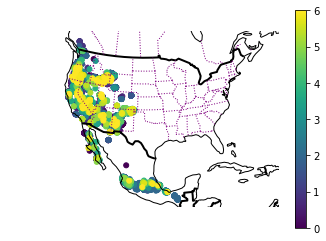

In [7]:

# same as before:  
proj = ccrs.LambertConformal(central_longitude=260, central_latitude=33)
ax = plt.axes(projection=proj)
ax.set_extent([-130, -70, 15, 52], crs=ccrs.PlateCarree())

ax.coastlines();

ax.add_feature(BORDERS,linestyle='-',linewidth=2)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
       edgecolor='purple',
        facecolor='none',
        linestyle='dotted')
ax.add_feature(states_provinces);# The NEW stuff!

gplt.pointplot(gdf,ax=ax,hue='CALCULATED AGE',legend=True);



There are many more plots that we can make with **geoplots**.  See this website for all the options:  https://residentmario.github.io/geoplot/plot_references/plot_reference.html

Let's go back to the data set you look at in Lectures 15 and 18 and make a better heatmap that with **plt.hist2d()**.  

In [8]:
#Read in the data file
df=pd.read_csv('Datasets/WUS_navdat.txt',sep='\t')
gdf=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.LONGITUDE,df.LATITUDE))



In [9]:
df.head()

,SAMPLE ID,CALCULATED AGE,CALCULATED MAX AGE,CALCULATED MIN AGE,LATITUDE,LONGITUDE,STATE,geometry
0,PENL-3,27.00,30.00,25.00,37.9483,-110.7789,UTAH,POINT (-110.7789 37.9483)
1,PENL-5,27.00,30.00,25.00,37.9550,-110.7881,UTAH,POINT (-110.7881 37.955)
2,PENL-6,27.00,30.00,25.00,37.9564,-110.7878,UTAH,POINT (-110.7878 37.9564)
3,U19A\S1-2240D,12.85,12.80,12.90,37.2734,-116.3703,NEVADA,POINT (-116.3703 37.2734)
4,U19BA1-1935.8S,13.16,13.15,13.17,37.2943,-116.3130,NEVADA,POINT (-116.313 37.2943)


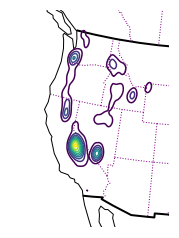

In [10]:

# same as before:  
proj = ccrs.LambertConformal(central_longitude=260, central_latitude=33)
ax = plt.axes(projection=proj)
ax.add_feature(BORDERS,linestyle='-',linewidth=2)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
       edgecolor='purple',
        facecolor='none',
        linestyle='dotted')
ax.add_feature(states_provinces);# The NEW stuff!

ax.coastlines()
# but with  the KDE plot.  
gplt.kdeplot(gdf,ax=ax);


That made a contour plot for the locations of volcanoes in the Western US. What we were after was a heatmap in which color indicates density of volcanoes.   We can do that with the **shade** argument and we can also specify a colormap with the familiar  **cmap** argument.  Maybe **cmap=inferno** is appropriate?  

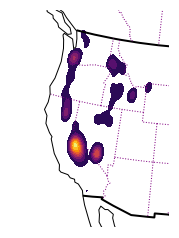

In [11]:

# same as before:  
proj = ccrs.LambertConformal(central_longitude=260, central_latitude=33)
ax = plt.axes(projection=proj)
ax.add_feature(BORDERS,linestyle='-',linewidth=2)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
       edgecolor='purple',
        facecolor='none',
        linestyle='dotted')
ax.add_feature(states_provinces);# The NEW stuff!

ax.coastlines()
# but with  the KDE plot.  
gplt.kdeplot(gdf,ax=ax,shade=True,cmap='inferno');


**geoplot** also allows us to access open source datasets like OpenStreetMap using **gplt.webmap()**.  

In [12]:
help(gplt.webmap)

Help on function webmap in module geoplot.geoplot:

webmap(df, extent=None, figsize=(8, 6), projection=None, zoom=None, provider='OSM_A', ax=None, **kwargs)
    A webmap.
    
    Parameters
    ----------
    df : GeoDataFrame
        The data being plotted.
    projection : geoplot.crs object instance, optional
        The projection to use. For reference see
        `Working with Projections
        <https://residentmario.github.io/geoplot/user_guide/Working_with_Projections.html>`_.
        ``webmap`` only supports a single projection: ``WebMercator``.
    extent : None or (min_longitude, min_latitude, max_longitude, max_latitude), optional
        Controls the plot extents. For reference see 
        `Customizing Plots#Extent
        <https://residentmario.github.io/geoplot/user_guide/Customizing_Plots.html#extent>`_.
    zoom: None or int
        The zoom level to use when fetching webmap tiles. Higher zoom levels mean more detail,
        but will also take longer to generate an

/opt/conda/lib/python3.6/site-packages/geoplot/geoplot.py:1685: UserWarning: "webmap" is only compatible with the "WebMercator" projection, but the input projection is unspecified. Reprojecting the data to "WebMercator" automatically. To suppress this warning, set "projection=gcrs.WebMercator()" explicitly.
  f'"webmap" is only compatible with the "WebMercator" projection, but the '


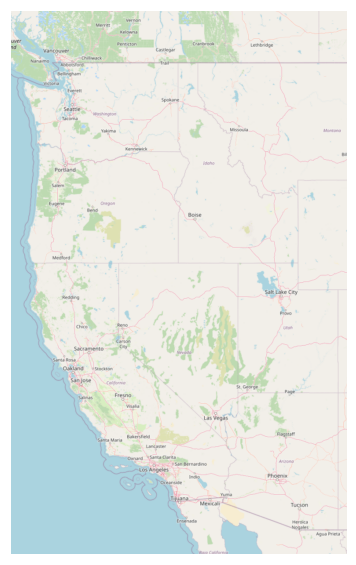

In [13]:
gplt.webmap(gdf,figsize=(10,10),provider='OSM_A');

The big advantage of **geopandas** is the ability to plot polygons.  Polygons outline geological features such as formations, age units, etc.   Coastlines are really polygons too.  In the rest of this lecture, we will explore making maps with some geologically interesting polygons - historical lava flows in Hawaii.  

We will proceed as follows: 

- get the coastline of the Big Islanad of Hawaii into a **geopandas.DataFrame**.
    - make a quick plot of Hawaii as a lightgreen polygon in a sea of lightblue. 
- find the elevation data for the Big Island of  Hawaii.
    - make a heatmap of the elevation data
    - make a contour plot of the elevation data (a topographic map).  
- find the lava flow outlines from https://pubs.usgs.gov/of/2007/1089/.
    - these data are in Datafiles/BigIslandData.shp and are in Universal Transverse Mercator and we really want them in lat/lon (in fact, on the WGS84 ellipsoid).  Converting between different coordinate systems just means we to know the transforms.  Here is a big list of them:  http://spatialreference.org.     
    - plot the converted polygons on the topographic map.   


Read in the coastlines for the State of Hawaii, filter for the Island Hawaii (it's the big one with the active lava flows) and plot the outline with the **plot** method on **geopandas** **DataFrames**.  

In [14]:
# read in the data as a geopandas dataframe
hawaii=gpd.read_file('Datasets/Coastline.shp')

# take a quick look at the format:
hawaii.head()



,objectid,water,sqmi,isle,totsqmi,createdby,agency,publishdat,featureuid,createdate,modifiedda,modifiedby,deliveryda,sourceid,severity,comments,st_areasha,st_lengths,geometry
0,1,0,554.722000,Kauai,554.7220,None,None,1899-12-30T00:00:00.000Z,{48E33DCC-4DD7-4387-8928-A02D83F9AAEB},None,None,None,2016-09-13T00:00:00.000Z,None,None,None,1.436729e+09,0,POLYGON ((-159.3870541757948 22.22195921261835...
1,2,0,0.424376,Niihau,72.3687,None,None,1899-12-30T00:00:00.000Z,{27E5BE15-4622-4A10-A364-2AC06476F3FB},None,None,None,2016-09-13T00:00:00.000Z,None,None,None,1.099133e+06,0,POLYGON ((-160.0969985981299 22.01466051044132...
2,3,0,71.944300,Niihau,72.3687,None,None,1899-12-30T00:00:00.000Z,{40D98504-C043-410B-B68E-32EA92678F0D},None,None,None,2016-09-13T00:00:00.000Z,None,None,None,1.863355e+08,0,POLYGON ((-160.0615397711178 21.99650558702817...
3,4,0,597.069000,Oahu,598.9200,None,None,1899-12-30T00:00:00.000Z,{C54FC846-8A66-45DB-AB2F-1BEA3891B5CA},None,None,None,2016-09-13T00:00:00.000Z,None,None,None,1.546408e+09,0,POLYGON ((-158.0034759970235 21.69940062560496...
4,5,0,0.712330,Oahu,598.9200,None,None,1899-12-30T00:00:00.000Z,{1C2967E7-3099-42C8-84ED-1D3481F90CDE},None,None,None,2016-09-13T00:00:00.000Z,None,None,None,1.844934e+06,0,"POLYGON ((-157.960706185876 21.36956956858352,..."


There are data from all the Hawaiian islands, so we should filter for the Big Island, which is actually named "Hawaii" too.  

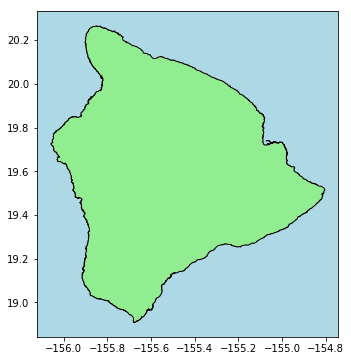

In [15]:
#Select only the data from island called "Hawaii". 
bigIsland=hawaii[(hawaii.isle=='Hawaii')]
fig, ax = plt.subplots(figsize=(8,6)) # make fig and ax objects
#Set the ocean to blue.
ax.set_facecolor('lightblue')
# plot the polygons from the geometry column
bigIsland.plot(ax=ax,edgecolor='black',linewidth=1,facecolor='lightgreen');


Ok, that was pretty easy.  Now let's put on the topography.  First, let's make a heatmap of the elevation data. In Lecture 19 we learned how to make **meshgrids** to use **plt.contour( )** and **plt.contourf( )**.  There is a cool way to make the same plot using **tricontour( )** and **tricontourf** from the **matplotlib.tri** module.  

To make life easier, we can use the **matplotlib.tri.tricontourf()** function. This takes unstructured x,y,z data  and constructs all the meshes for us.  

But we have to import the function first, as this is a new one.  It has a number of functions which you can explore (try **help(tri)** after importing the module.   

In [16]:
import matplotlib.tri as tri

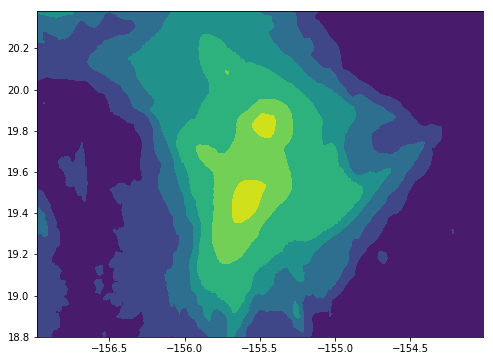

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
# read in the elevation data as a Pandas DatFrame.  
bigIslandElev=pd.read_csv('Datasets/BigIslandElev.csv')
# plot longitude as x, latitude as y and elevation as z:
x=bigIslandElev.lon.values
y=bigIslandElev.lat.values
z=bigIslandElev.elevation.values
ax.tricontourf(x,y,z);

Well that was relatively painless.  Now let's plot the same data, but as a contour plot.

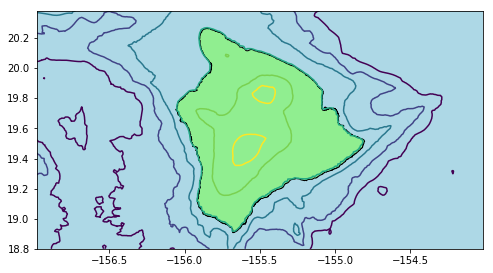

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
#Setting the ocean to blue.
ax.set_facecolor('lightblue')
bigIsland.plot(ax=ax,edgecolor='black',linewidth=1,facecolor='lightgreen')

ax.tricontour(x,y,z);


and a few whistles and bells:

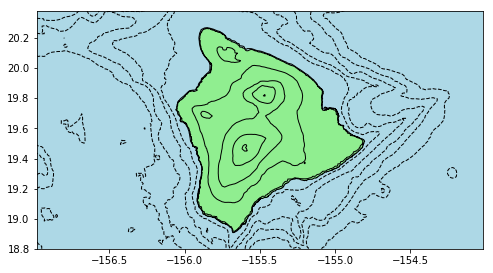

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
#Setting the ocean to blue.
ax.set_facecolor('lightblue')
bigIsland.plot(ax=ax,edgecolor='black',linewidth=1,facecolor='lightgreen')

ax.tricontour(x,y,z,colors='k',linewidths=1,levels=np.arange(-5000,5000,1000));


Now we can read in the flow polygons and convert them from UTM to WGS84. 

But first what are 'UTM' and 'WGS84'?  

### Coordinate Systems 

There are many coordinate systems, but the two used with GPS are geodetic latitude/longitude/elevation and UTM (Universal Transverse Mercator). 

Lat/Lon/Elevation: The prime meridian and the equator are the reference planes used to define latitude and longitude.  The geodetic latitude of a point is the angle from the equatorial plane to the vertical direction of  a line normal to the reference ellipsoid.  The geodetic longitude of a point is the angle between a reference plane and a plane passing through the point, both planes being perpendicular to the equatorial plane.  The geodetic elevation is at a point is the distance from the reference ellipsoid to the point in a direction normal to the ellipsoid.  We will be using the reference ellipsoid known as WGS84 (although there are many so be careful!)  

The Universal Transverse Mercator (UTM) coordinates define map locations (2D) within zones.  Zone numbers designate 6 degree longitudinal strips. The letters go from A (south pole) to Z (north pole). So  Each zone has a central meridian (CM).  Northings/eastings are measured from the equator and the CM.   San Diego is in zone S11, for example.  

It turns out that with **Geopandas**, conversion is pretty straightforward, once you know the details of what coordinate system you are in.  For this exercise, the data are from Hawaii and are in zone 4 based on the NAD83 ellipsoid in units of meters.  We want them in longitude/latitude on ellipsoid WGS84. 


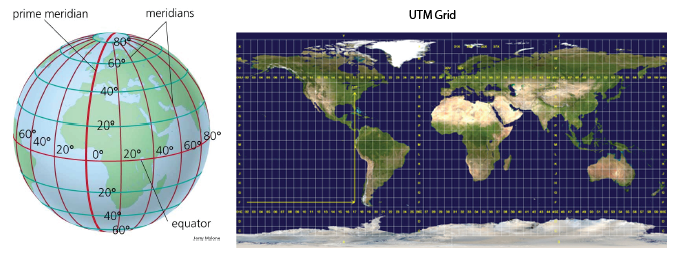

In [20]:
Image('Figures/coordinateSystems.png')

Lets set our conversion strings, read in the data and first take a look at the geometry field in UTM. 

In [21]:
#Set Conversion Strings
UTM4='+proj=utm +zone=4 +ellps=GRS80 +datum=NAD83 +units=m +no_defs'
WGS84='+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

#Get Big Island Flows and convert to WGS84
bigIslandFlows=gpd.read_file('Datasets/BigIslandData.shp',crs=UTM4)
# in UTM4
bigIslandFlows.head()



,ID,ISLAND,VOLCANO,STRAT_CODE,SYMBOL,AGE_GROUP,AGE_RANGE,NAME,NAME0,UNIT,ROCK_TYPE,LITHOLOGY,VOLC_STAGE,COMPOSITIO,SOURCE,Ages,geometry
0,5522,Hawaii,mloa,209,Qk5,1,A.D. 1843,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1843.0,"POLYGON ((862851.7650805543 2185118.765394682,..."
1,5715,Hawaii,mloa,209,Qk5,1,A.D. 1880-1881,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1881.0,"POLYGON ((909140.8345211237 2184113.619989122,..."
2,5733,Hawaii,mloa,209,Qk5,1,A.D. 1855,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1855.0,"POLYGON ((899049.8753678566 2183325.490410618,..."
3,5787,Hawaii,mloa,209,Qk5,1,A.D. 1935,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1935.0,"POLYGON ((868383.95149384 2181757.819505497, 8..."
4,5986,Hawaii,mloa,209,Qk5,1,A.D. 1880-1881,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1881.0,"POLYGON ((879570.0329822211 2179034.793769511,..."


Looking at the polygon for the first flow (ID=5522), we can see how the POLYGON column has points like (862851.7650805543 2185118.765394682,...).  These are the Easting and Northing of a point on the flow with ID 5522.  How do I know which is easting and which is northing???   (HINT: think about the definitions).  

In [22]:
bigIslandFlows.loc[bigIslandFlows.ID==5522]['geometry']

0    POLYGON ((862851.7650805543 2185118.765394682,...
Name: geometry, dtype: geometry

We can convert between coordinate systems when we read the file in like this: 

In [23]:
bigIslandFlows=gpd.read_file('Datasets/BigIslandData.shp',crs=UTM4).to_crs(WGS84)
bigIslandFlows.head()

,ID,ISLAND,VOLCANO,STRAT_CODE,SYMBOL,AGE_GROUP,AGE_RANGE,NAME,NAME0,UNIT,ROCK_TYPE,LITHOLOGY,VOLC_STAGE,COMPOSITIO,SOURCE,Ages,geometry
0,5522,Hawaii,mloa,209,Qk5,1,A.D. 1843,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1843.0,POLYGON ((-155.5387719000084 19.72830027097852...
1,5715,Hawaii,mloa,209,Qk5,1,A.D. 1880-1881,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1881.0,"POLYGON ((-155.0981627643755 19.7101726402176,..."
2,5733,Hawaii,mloa,209,Qk5,1,A.D. 1855,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1855.0,POLYGON ((-155.1944049010803 19.70513334985187...
3,5787,Hawaii,mloa,209,Qk5,1,A.D. 1935,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1935.0,POLYGON ((-155.4867369901313 19.69695826679061...
4,5986,Hawaii,mloa,209,Qk5,1,A.D. 1880-1881,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1881.0,POLYGON ((-155.3807645030818 19.67028018736004...


And now notice how the polygon is in longitude/latitude:

In [24]:
bigIslandFlows.loc[bigIslandFlows.ID==5522]['geometry']


0    POLYGON ((-155.5387719000084 19.72830027097852...
Name: geometry, dtype: geometry

And now for the plot!

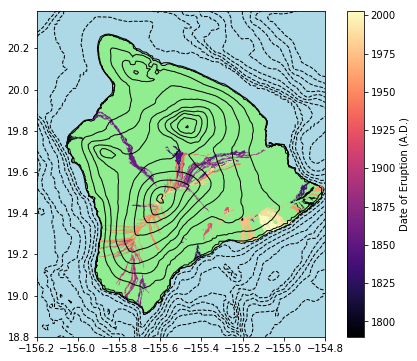

In [26]:
# from before
fig, ax = plt.subplots(figsize=(8,6))
#Setting the ocean to blue.
ax.set_facecolor('lightblue')
bigIsland.plot(ax=ax,edgecolor='black',linewidth=1,facecolor='lightgreen')

ax.tricontour(x,y,z,colors='k',linewidths=1,levels=np.arange(-5000,5000,500))

# now the flow polygons: 
bigIslandFlows.plot(ax=ax,column='Ages',cmap='magma',legend=True,legend_kwds={'label':'Date of Eruption (A.D.)'})
plt.xlim(-156.2,-154.8)
plt.savefig('hawaii.jpg');
